In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Thu, 09 Jan 2020 15:30


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"39,709,168","38,190,420","-1,518,748",-3.82%
HOV,"108,593","105,013","-3,580",-3.30%
Principal Arterial,"920,365","1,012,408","92,043",10.00%
Ramp,"29,383","24,188","-5,195",-17.68%
Total,"40,767,509","39,332,029","-1,435,480",-3.52%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"28,864,568","27,452,918","-1,411,650",-4.89%
Pierce,"6,410,825","6,616,220","205,395",3.20%
Snohomish,"5,492,116","5,262,891","-229,225",-4.17%
Total,"40,767,509","39,332,029","-1,435,480",-3.52%


----
### Scatterplots 

C:\anaconda\envs\model\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


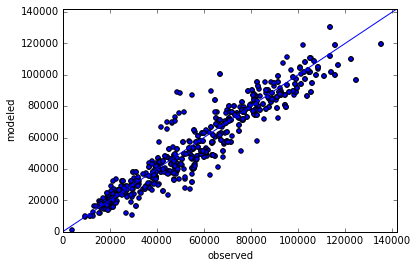

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.949717356722


---
By County

King r^2: 0.960665807677
Pierce r^2: 0.80022801905


Snohomish r^2: 0.983298206527


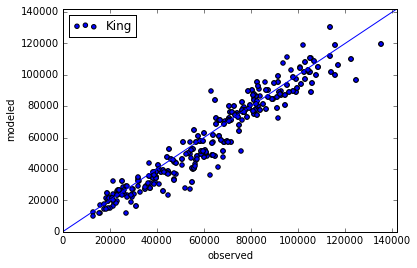

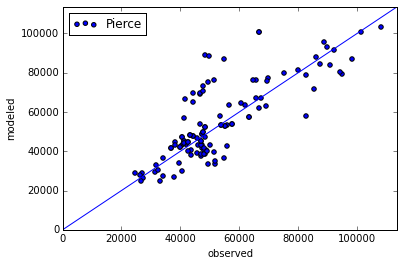

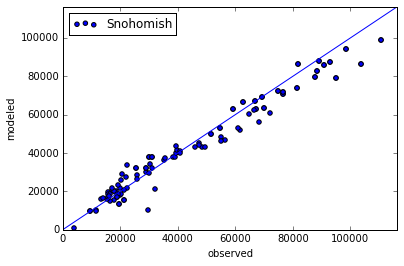

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.938997457883
r^2 Principal Arterial: 0.925055552356


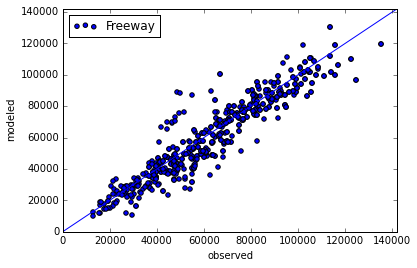

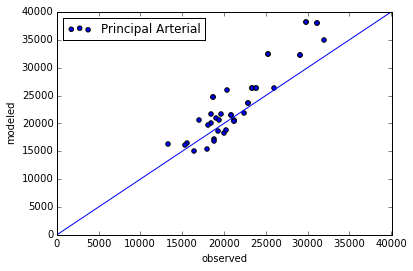

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","518,171","-50,246",-8.84%
1,KENT,"550,322","483,146","-67,176",-12.21%
2,SEATTLE - SOUTH OF CBD,"526,500","499,041","-27,459",-5.22%
3,SHIP CANAL,"519,802","542,623","22,821",4.39%
4,KIRKLAND-REDMOND,"414,120","380,264","-33,856",-8.18%
5,MILL CREEK,"400,848","378,372","-22,476",-5.61%
6,SOUTH BELLEVUE,"399,500","348,315","-51,185",-12.81%
7,SEATTLE - NORTH,"372,000","362,843","-9,157",-2.46%
8,TACOMA - EAST OF CBD,"312,164","313,117",953,0.31%
9,PARKLAND,"304,322","263,651","-40,671",-13.36%


r^2 : 0.991578168874


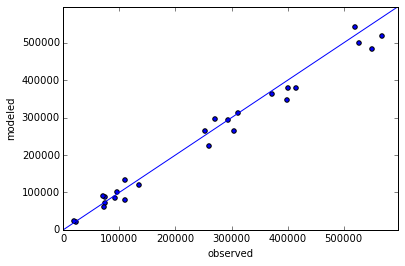

In [12]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
df[['observed_20to5','modeled_20to5','diff']] = df[['observed_20to5','modeled_20to5','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_20to5', ascending=False)

,agency,observed_20to5,modeled_20to5,diff,perc_diff
2,King County Metro,"392,694","308,734","-83,960",-21.38%
5,Sound Transit,"145,426","92,036","-53,390",-36.71%
0,Community Transit,"30,918","33,035","2,117",6.85%
4,Pierce Transit,"27,233","38,359","11,125",40.85%
6,Washington Ferries,"16,912","8,805","-8,107",-47.94%
3,Kitsap Transit,"7,638","9,567","1,929",25.26%
1,Everett Transit,"3,290","1,691","-1,600",-48.62%


----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_20to5','modeled_20to5']] = df[['observed_20to5','modeled_20to5']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_20to5,modeled_20to5,diff,perc_diff
0,POF West Seattle - S,"1,356",716,-639,-47.16%
1,POF Vashon Island -,670,13,-656,-98.00%
2,WSF Kingston - Edmon,"1,732",537,"-1,195",-68.97%
3,WSF Bainbridge Islan,"8,857","4,829","-4,027",-45.47%
4,WSF Bremerton - Seat,"4,484","3,029","-1,455",-32.45%
5,WSF Southworth - Fau,365,109,-257,-70.24%
6,WSF Vashon Island -,946,260,-686,-72.48%
7,WSF Southworth - Vas,239,25,-214,-89.51%
8,WSF Point Defiance -,289,14,-274,-95.07%


r^2 : 0.988534015422


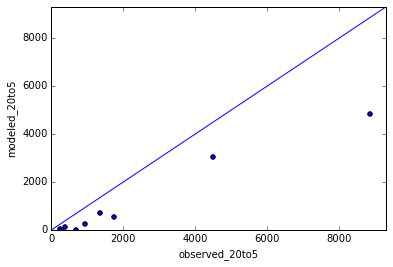

In [15]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_20to5,modeled_20to5,diff,perc_diff
0,Link Red Line,"69,383","32,560","-36,823",-53.07%
1,Sounder South,"15,356","5,293","-10,063",-65.53%
2,Sounder North,"1,667",839,-828,-49.66%


r^2 : 0.99805910847


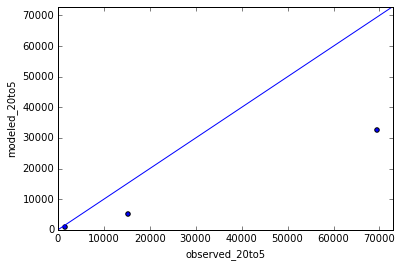

In [17]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_20to5', ascending=False)

,description,observed_20to5,modeled_20to5,diff,perc_diff
6,E Line RapidRide,"15,336","11,944","-3,392",-22.11%
10,Sound Transit 550,"9,168","9,747",580,6.32%
2,A Line RapidRide,"8,522","8,908",386,4.53%
1,KC Metro 40,"11,405","8,667","-2,738",-24.01%
5,D Line RapidRide,"13,078","8,212","-4,866",-37.21%
4,C Line RapidRide,"11,368","7,807","-3,561",-31.32%
0,KC Metro 7,"10,150","6,351","-3,799",-37.43%
7,F Line RapidRide,"5,267","5,435",168,3.20%
3,B Line RapidRide,"5,914","4,118","-1,796",-30.37%
9,First Hill Streetcar,"3,586",800,"-2,786",-77.68%


r^2 : 0.895577650332


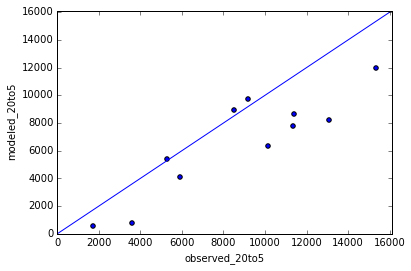

In [19]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.854446790768
r^2 Everett Transit: -0.340187357235


r^2 King County Metro: 0.921387044977
r^2 Kitsap Transit: 0.679800731522


r^2 Pierce Transit: 0.921489170456
r^2 Sound Transit: 0.970322884414


r^2 Washington Ferries: 0.988942438718


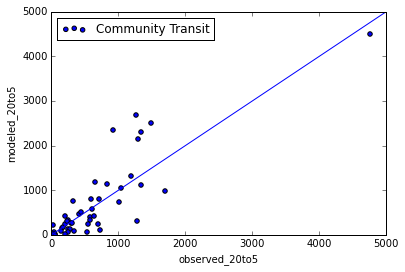

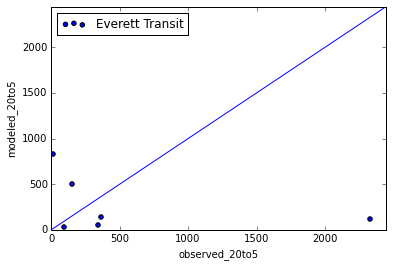

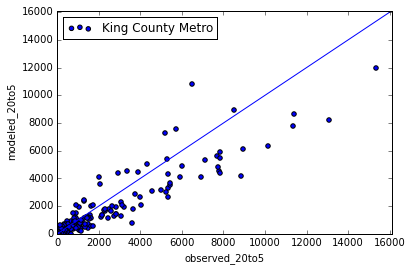

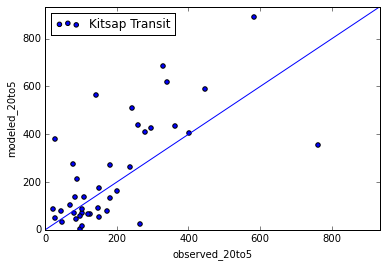

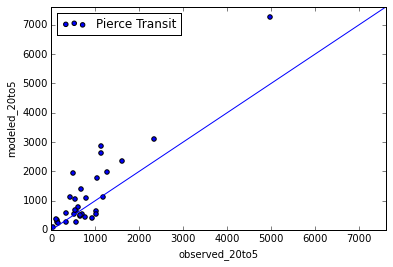

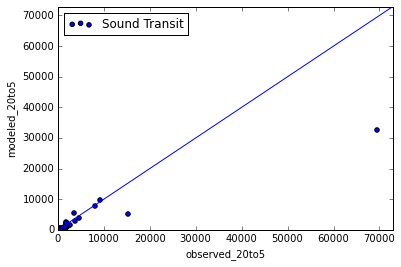

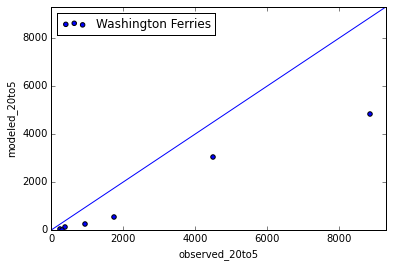

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5', label=agency)
    lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_20to5']-df['observed_20to5']
df['percent_diff'] = df['diff']/df['observed_20to5']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_20to5,modeled_20to5,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","4,382","-5,034",-53.46%
Westlake,"10,904","3,911","-6,992",-64.13%
University St,"5,257","2,674","-2,583",-49.14%
Pioneer Square,"3,865","3,263",-602,-15.58%
Int'l District,"5,647","1,529","-4,119",-72.93%
Capitol Hill,"7,016","3,198","-3,818",-54.42%
Stadium,"1,912",226,"-1,686",-88.19%
SODO,"2,108","1,429",-679,-32.22%
Beacon Hill,"2,587",743,"-1,844",-71.28%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_20to5','modeled_20to5']]
df_combined['diff'] = df_combined['modeled_20to5']-df_combined['observed_20to5']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_20to5']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_20to5,modeled_20to5,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","4,382","-5,034",-53.46%
Capitol Hill,"7,016","3,198","-3,818",-54.42%
Westlake/University St,"16,161","6,585","-9,576",-59.25%
Pioneer Square/Int'l District,"9,512","4,792","-4,721",-49.63%
Stadium/SODO,"4,020","1,654","-2,365",-58.84%
Beacon Hill/Mount Baker,"4,809","1,705","-3,105",-64.55%
Columbia City,"2,376",760,"-1,616",-68.01%
Othello/Rainier Beach,"4,412","1,813","-2,599",-58.90%
Tukwila Int'l Blvd,"2,779","1,130","-1,649",-59.33%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.17,-99.00,99.17,-100.17%
Westlake,0.56,0.36,0.19,52.77%
University St,0.71,0.20,0.51,253.94%
Pioneer Square,0.80,0.16,0.64,404.97%
Int'l District,0.79,0.45,0.34,76.27%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.54,0.12,0.42,350.24%
SODO,0.56,0.31,0.25,78.36%
Beacon Hill,0.33,0.35,-0.02,-5.80%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","152,682","22,682",17.45%
I-5 to Mount Vernon,3744,"67,000","65,300","-1,700",-2.54%
I-90 @ Snoqualmie Pass,3739,"33,000","29,743","-3,257",-9.87%
SR-532 to Camano Island,3746,"23,000","20,706","-2,294",-9.98%
SR-507 to Yelm,3734,"23,000","19,150","-3,850",-16.74%
SR-3 to Belfair,3749,"18,000","21,001","3,001",16.67%
Hood Canal Bridge,3748,"18,000","17,664",-336,-1.87%
SR-530 N/O Stanwood,3745,"9,100","8,074","-1,026",-11.27%
Mukilteo-Clinton Ferry,3747,"6,300","7,635","1,335",21.18%
